In [24]:
import numpy as np
import pandas as pd

returns = pd.read_csv('/Users/Jinyanting/Documents/GitHub/PortfolioConstruction/Week1/data/Portfolios_Formed_on_ME_monthly_EW.csv',
                     header=0, index_col=0, parse_dates=True, na_values=-99.99)
columns = ['Lo 10','Hi 10']
returns = returns[columns]
returns.columns=['SmallCap','LargeCap']
returns = returns/100
returns.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [25]:
returns.index = pd.to_datetime(returns.index,format = "%Y%m")


In [26]:
returns

,SmallCap,LargeCap
1926-07-01,-0.0145,0.0329
1926-08-01,0.0512,0.0370
1926-09-01,0.0093,0.0067
1926-10-01,-0.0484,-0.0243
1926-11-01,-0.0078,0.0270
...,...,...
2018-08-01,0.0241,0.0234
2018-09-01,-0.0168,0.0087
2018-10-01,-0.1002,-0.0657
2018-11-01,-0.0365,0.0253


In [27]:
returns.index = returns.index.to_period("M")

In [28]:
returns.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

In [29]:
returns.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


In [30]:
# Compute Drawndowns
wealth_index = 1000*(1+returns["LargeCap"]).cumprod()

In [31]:
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

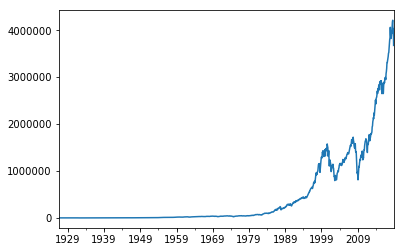

In [32]:
wealth_index.plot.line()

In [33]:
previous_peaks = wealth_index.cummax()

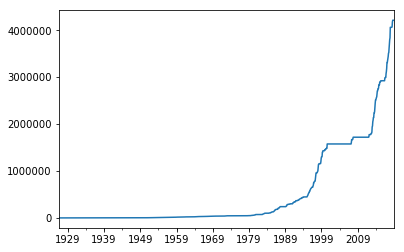

In [34]:
previous_peaks.plot()


In [35]:
drawdown = (wealth_index-previous_peaks)/previous_peaks

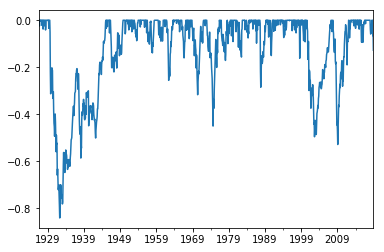

In [36]:
drawdown.plot()

In [37]:
drawdown.mean()

-0.12850062747161928

In [39]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [40]:
drawdown["1975":].min()

-0.5280945042309304

In [41]:
drawdown["1975":].idxmin()

Period('2009-02', 'M')

In [42]:
drawdown.idxmin()

Period('1932-05', 'M')

In [48]:
def drawdown(returns_series:pd.Series):
    """
    Takes a time series of asset returns
    Compute and returns a DataFrame that contrains:
    the wealth index
    the previous peaks
    percent drawdowns
    """
    wealth_index = 1000*(1+returns_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index-previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks"  : previous_peaks,
        "Drawdowns":drawdowns,
    })
    

In [51]:
drawdown(returns["LargeCap"]).head()

,Wealth,Peaks,Drawdowns
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [53]:
drawdown(returns["LargeCap"])[['Wealth','Peaks']]

,Wealth,Peaks
1926-07,1.032900e+03,1.032900e+03
1926-08,1.071117e+03,1.071117e+03
1926-09,1.078294e+03,1.078294e+03
1926-10,1.052091e+03,1.078294e+03
1926-11,1.080498e+03,1.080498e+03
...,...,...
2018-08,4.175915e+06,4.175915e+06
2018-09,4.212246e+06,4.212246e+06
2018-10,3.935501e+06,4.212246e+06
2018-11,4.035069e+06,4.212246e+06


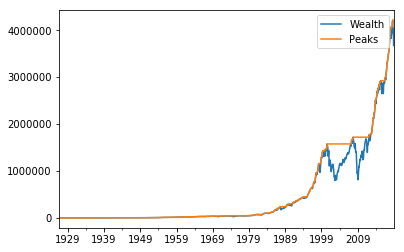

In [54]:
drawdown(returns["LargeCap"])[['Wealth','Peaks']].plot()

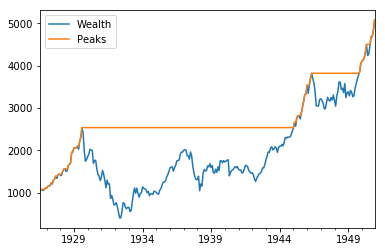

In [55]:
drawdown(returns[:'1950']["LargeCap"])[['Wealth','Peaks']].plot()

In [57]:
drawdown(returns["LargeCap"]).head()

,Wealth,Peaks,Drawdowns
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [59]:
drawdown(returns["LargeCap"])["Drawdowns"].min()

-0.8400375277943123

In [60]:
drawdown(returns["SmallCap"])["Drawdowns"].min()

-0.8330007793945303

In [61]:
drawdown(returns["SmallCap"])["Drawdowns"].idxmin()

Period('1932-05', 'M')

In [62]:
drawdown(returns["LargeCap"])["Drawdowns"].idxmin()

Period('1932-05', 'M')

In [63]:
drawdown(returns['1940':]["SmallCap"])["Drawdowns"].idxmin()

Period('1974-12', 'M')

In [64]:
drawdown(returns['1975':]["SmallCap"])["Drawdowns"].idxmin()

Period('2009-02', 'M')

In [66]:
drawdown(returns['1975':]["SmallCap"])["Drawdowns"].min()

-0.6312068077252386

In [68]:
drawdown(returns['1975':]["LargeCap"])["Drawdowns"].idxmin()

Period('2009-02', 'M')

In [69]:
drawdown(returns['1975':]["LargeCap"])["Drawdowns"].min()

-0.5280945042309303

In [73]:
drawdown(returns["LargeCap"])["Drawdowns"].head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: Drawdowns, dtype: float64

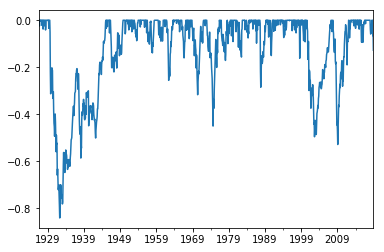

In [74]:
drawdown(returns["LargeCap"])["Drawdowns"].plot()
plot

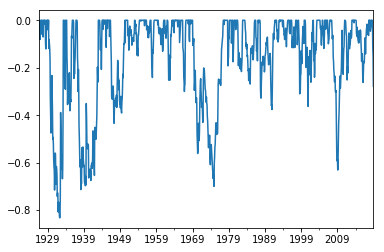

In [75]:
drawdown(returns["SmallCap"])["Drawdowns"].plot()

The drawdown for LargeCap companies is equally bad as those 

TypeError: float() argument must be a string or a number, not 'Period'

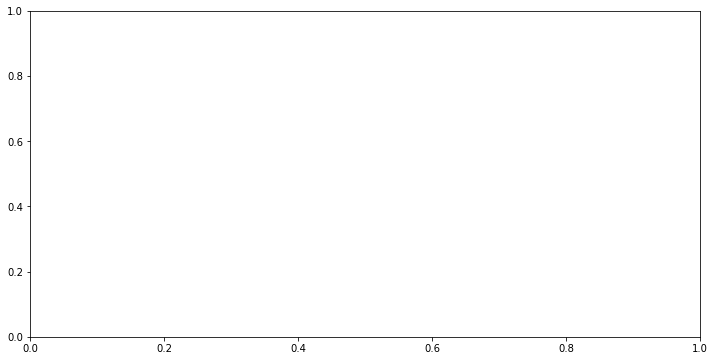

In [76]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(drawdown(returns["SmallCap"])["Drawdowns"])

plt.show()